In [ ]:
#INTRODUCTION:
    #I used the Gapminder World data to show the relations between income and country, 
    #religion distribution worldwide, and the ties to religion and region. 
#The Questions posed?
    #Is there a relationship between the region and the level of income of the residents?
    #What are the two main religions worldwide?
    #Is there a relationship between the region and the two main religions worldwide?

    

In [ ]:
#Importing all the Packages that are needed

In [106]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_context('notebook', font_scale=1.25)

In [107]:
#Importing the CSV and cleaning the data

In [108]:
df = pd.read_csv('geodata.csv')
df.fillna("0",inplace=True)
df.head()

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,west_and_rest,world_4region,world_6region
0,abkh,others,0,0,True,0,0,0,0,0,...,Abkhazia,0,0,False,0,0,0,0,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,0,coastline,...,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,0,AW,0,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,0,landlocked,...,Afghanistan,un_least_developed,un_central_and_southern_asia,True,unhcr_asia_pacific,sa,AF,rest,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,0,coastline,...,Angola,un_least_developed,un_sub_saharan_africa,True,unhcr_southern_africa,ssa,AO,rest,africa,sub_saharan_africa
4,aia,others,0,0,True,AI,AIA,660.0,0,coastline,...,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,0,AI,0,americas,america


In [109]:
def print_function(dfname):
    print(dfname)

print_function(df)

       country g77_and_oecd_countries income_3groups        income_groups  \
0         abkh                 others              0                    0   
1          abw                 others    high_income          high_income   
2          afg                    g77     low_income           low_income   
3          ago                    g77  middle_income  lower_middle_income   
4          aia                 others              0                    0   
..         ...                    ...            ...                  ...   
268  yem_south                 others              0                    0   
269        yug                 others              0                    0   
270        zaf                    g77  middle_income  upper_middle_income   
271        zmb                    g77  middle_income  lower_middle_income   
272        zwe                    g77  middle_income  lower_middle_income   

     is--country iso3166_1_alpha2 iso3166_1_alpha3 iso3166_1_numeric  \
0  

In [110]:
#Pulling the Columns I need to make the visualizations

In [111]:
new_df = df[["name","income_groups","landlocked","main_religion_2008","world_4region","world_6region"]]
new_df.head()

,name,income_groups,landlocked,main_religion_2008,world_4region,world_6region
0,Abkhazia,0,0,0,europe,europe_central_asia
1,Aruba,high_income,coastline,christian,americas,america
2,Afghanistan,low_income,landlocked,muslim,asia,south_asia
3,Angola,lower_middle_income,coastline,christian,africa,sub_saharan_africa
4,Anguilla,0,coastline,christian,americas,america


In [ ]:
#Question 1: Is there a relationship between the region and the level of income of the residents?

In [112]:
#Here we are grouping by Region and Income groups and then counting the frequency of each income group per region

In [113]:
byincome_df = new_df.groupby(['world_4region','income_groups'])
byincome_df = byincome_df.count()
byincome_df.head()

name  landlocked  main_religion_2008  \
world_4region income_groups                                               
0             0                       2           2                   2   
africa        0                       7           7                   7   
              high_income             1           1                   1   
              low_income             24          24                  24   
              lower_middle_income    21          21                  21   

                                   world_6region  
world_4region income_groups                       
0             0                                2  
africa        0                                7  
              high_income                      1  
              low_income                      24  
              lower_middle_income             21

In [114]:
byincome_df = byincome_df[[ 'name']]
print_function(byincome_df)

                                   name
world_4region income_groups            
0             0                       2
africa        0                       7
              high_income             1
              low_income             24
              lower_middle_income    21
              upper_middle_income     8
americas      0                      12
              high_income            20
              low_income              1
              lower_middle_income     4
              upper_middle_income    20
asia          0                      15
              high_income            21
              low_income              6
              lower_middle_income    20
              upper_middle_income    18
europe        0                      19
              high_income            38
              lower_middle_income     2
              upper_middle_income    14


In [115]:
africa_highincome = byincome_df.iloc[2,0]
americas_highincome = byincome_df.iloc[7,0]
asia_highincome = byincome_df.iloc[12,0]
europe_highincome = byincome_df.iloc[17,0]

africa_lowincome = byincome_df.iloc[3,0]
america_lowincome = byincome_df.iloc[8,0]
asia_lowincome = byincome_df.iloc[13,0]
europe_lowincome = byincome_df.iloc[18,0]

income_high = [africa_highincome,americas_highincome,asia_highincome,europe_highincome]
income_low = [africa_lowincome,america_lowincome,asia_lowincome,europe_lowincome]

print_function(income_high)


[1, 20, 21, 38]


In [116]:
#Here we are using the above information to plot a bar chart 
#I decided to use a bar chart because I thought it would accuratly show the relationship between high and low income per region.

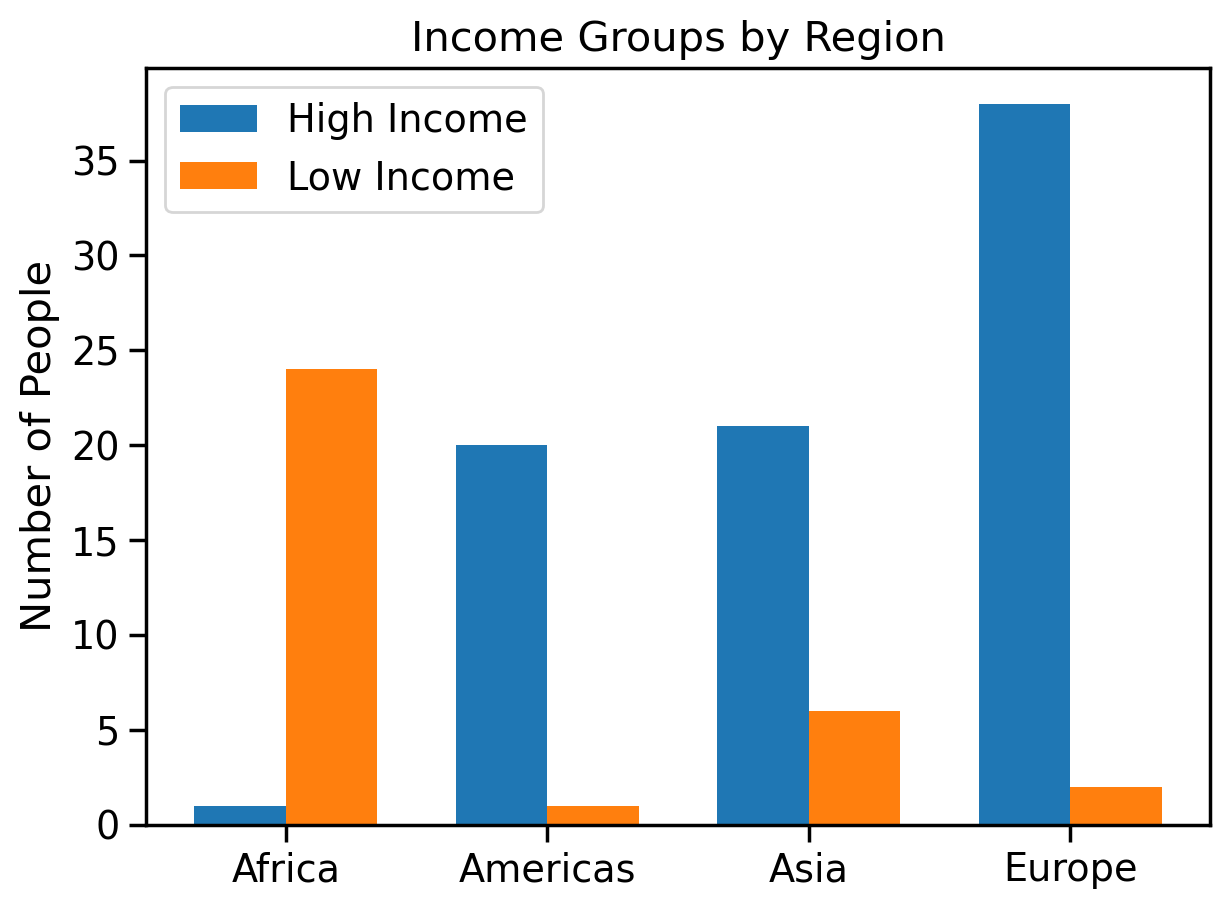

In [117]:
#Bar Chart
labels = ['Africa','Americas','Asia','Europe']
income_high = [africa_highincome,americas_highincome,asia_highincome,europe_highincome]
income_low = [africa_lowincome,america_lowincome,asia_lowincome,europe_lowincome]


x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, income_high, width, label ='High Income')
rects2 = ax.bar(x + width/2, income_low, width, label ='Low Income')

ax.set_ylabel('Number of People')
ax.set_title('Income Groups by Region')
ax.set_xticks(x,labels)
ax.legend()



fig.tight_layout()
plt.show()


In [ ]:
# Conclusion
#There is a relationship between income and regions. In regions that tend to be more affluent, the residents make more money compared to those in regions that are not affluent. As seen on the chart Europe, a historically affluent region has the most residents with a high income while Africa, a historically poor region, has the lowest number of residents with a high income.


In [ ]:
#Question 2:What are the two main religions worldwide?

In [118]:
#Here we are grouping by religion and counting the frequency of the religion

In [119]:
byreligion_df = new_df.groupby(['main_religion_2008'])
byreligion_df = byreligion_df.count()

In [120]:
#Using the data from above to make a pie chart
name = byreligion_df['name']
name.head()

main_religion_2008
0                     57
christian            153
eastern_religions     15
muslim                48
Name: name, dtype: int64

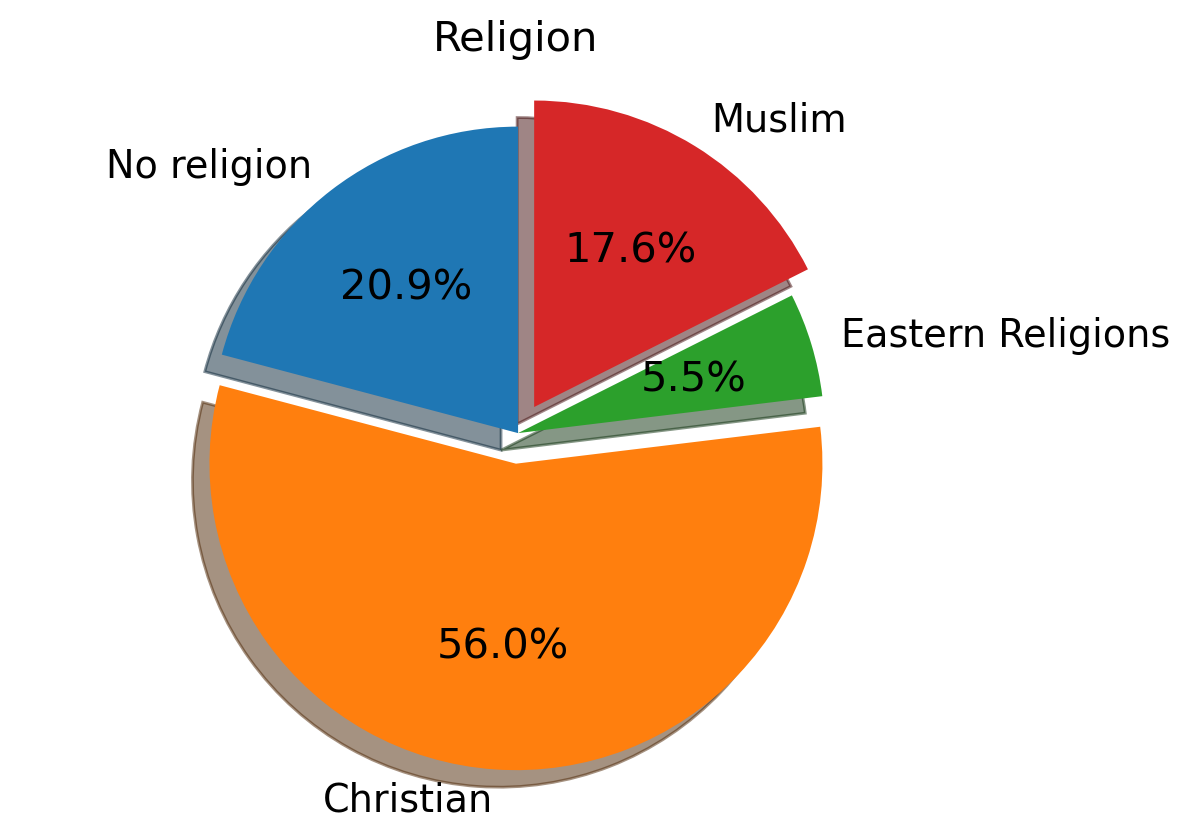

In [121]:
#Pie Chart
#I used the pie chart because it would visually show the difference in the number of people practicing each religion.
labels = ['No religion','Christian','Eastern Religions','Muslim']
sizes = name
explode = (0,0.1,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct ='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Religion')
plt.show()

In [ ]:
# Conclusion
#The two main religions are Christianity and Islam. As suspected Christianity is overwhelmingly the most popular religion worldwide. While Islam is the second most popular religion I do want to note that “No Religion” has a higher percentage at 20% compared to the 18% Islam holds. This means that there is quite a bit of people who either do not believe in religion entirely or do not have a strong enough hold on one to report it. 


In [ ]:
#Question 3:Is there a relationship between the region and the two main religions worldwide?

In [122]:
#Here we are grouping by region and religion and then counting the frequency of religion in that region

In [123]:
byreligion_df = new_df.groupby(['world_4region','main_religion_2008'])
byreligion_df = byreligion_df.count()
byreligion_df = byreligion_df[["name"]]
print_function(byreligion_df)


                                  name
world_4region main_religion_2008      
0             0                      2
africa        0                     14
              christian             27
              muslim                20
americas      0                      7
              christian             50
asia          0                     15
              christian             26
              eastern_religions     15
              muslim                24
europe        0                     19
              christian             50
              muslim                 4


In [124]:
africa_christian = byreligion_df.iloc[3,0]
americas_christian = byreligion_df.iloc[6,0]
asia_christian = byreligion_df.iloc[8,0]
europe_christian = byreligion_df.iloc[12,0]

africa_muslim = byreligion_df.iloc[4,0]
america_muslim = byreligion_df.iloc[7,0]
asia_muslim = byreligion_df.iloc[10,0]
europe_muslim = byreligion_df.iloc[12,0]
christian = [africa_christian,americas_christian,asia_christian,europe_christian]
muslim = [africa_muslim,america_muslim,asia_muslim,europe_muslim]



print_function(muslim)


[7, 26, 19, 4]


In [125]:
#We took the information above and made a bar chart to show the two biggest religions by region

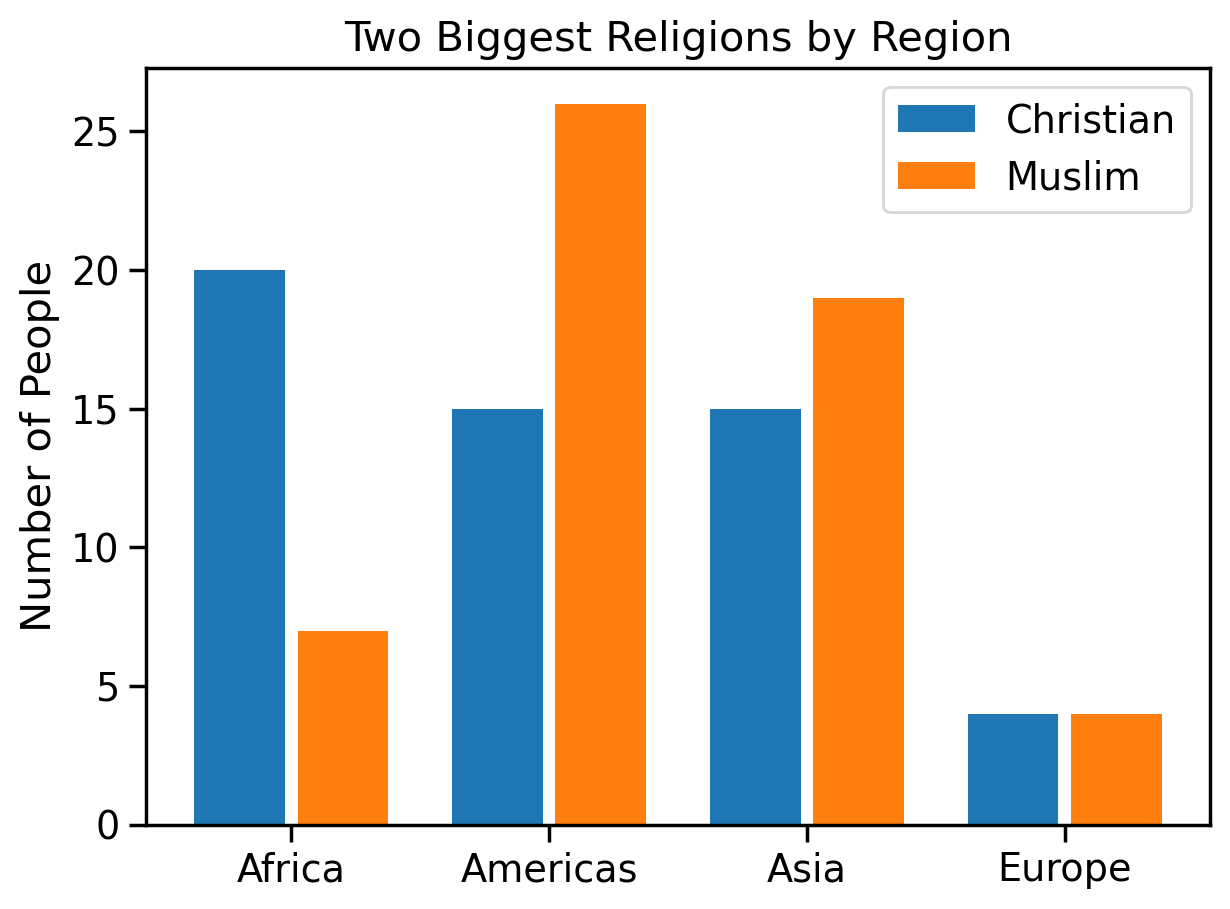

In [126]:
#Bar Chart
#I used a bar chart to show the difference between the two main religions per region.
labels = ['Africa','Americas','Asia','Europe']

christian = [africa_christian,americas_christian,asia_christian,europe_christian]
muslim = [africa_muslim,america_muslim,asia_muslim,europe_muslim]


x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, christian, width, label ='Christian')
rects2 = ax.bar(x + 0.2, muslim, width, label ='Muslim')

ax.set_ylabel('Number of People')
ax.set_title('Two Biggest Religions by Region')
ax.set_xticks(x,labels)
ax.legend()



fig.tight_layout()
plt.show()

In [ ]:
# Conclusion
#The relationship between the two biggest religions by region was as I expected. America and Europe both overwhelmingly hold the largest number of Christians. Whereas in Asia and Africa, it is similar the number of practicing Christians and Muslims.


In [ ]:
# Limitations
#One of the limitations I faced when looking at the data about religion is that there was a lot of blanks so people were not accuratly reporting their religion. Furthermore I do not think the religion one was inclusive of all religions which is why people were not accuratly reporting their religion.
#The second limitation is that there should be a middle for the income rather than only an upper middle and lower middle because then the people who would report as middle are now inacccuratly reporting as either upper middle or lower middle.